# Finding the best chocolate bars

Now let's now move on to the competition and challenge.

## 📖 Background
You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

## 💾 The data

#### Your team created a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

### **Importing necessary modules**

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Reading the dataset

In [91]:
df = pd.read_csv('data/chocolate_bars.csv')
df.head(50)

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
5,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80.0,3.0,"B,S,C","mildly bitter, basic cocoa, fatty",3.25
6,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,3.0,"B,S,C","milk brownie, macadamia,chewy",3.50
7,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4.0,"B,S,C,L","vegetal, nutty",3.50
8,797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75
9,1011,A. Morin,France,2013,Panama,Panama,70.0,4.0,"B,S,C,L","brief fruit note, earthy, nutty",2.75


### **Understanding the dataset**

Checking for:
1) The shape of the dataframe
2) Info of the dataframe
3) Null values
4) Duplicated values

In [92]:
df.shape
## 2530 rows with 11 columns

(2530, 11)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [94]:
df.duplicated()
## No duplicated values observed

0       False
1       False
2       False
3       False
4       False
        ...  
2525    False
2526    False
2527    False
2528    False
2529    False
Length: 2530, dtype: bool

In [95]:
df.isna().sum()
## Null values in the dataset

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

### **Analysing the correlation between the columns**

In [96]:
##Comparing all the numeric types to obtain the ir correlation
df.corr()

## id and year_reviewed are both identifiers, rather than data that possesses numeric meaning. So there are no strong correlations in the data itself.

,id,year_reviewed,cocoa_percent,num_ingredients,rating
id,1.000000,0.993126,0.015835,-0.356845,0.113398
year_reviewed,0.993126,1.000000,0.016484,-0.362956,0.116256
cocoa_percent,0.015835,0.016484,1.000000,-0.187468,-0.146690
num_ingredients,-0.356845,-0.362956,-0.187468,1.000000,-0.098834
rating,0.113398,0.116256,-0.146690,-0.098834,1.000000


### ****Q1:** What is the average rating by country of origin?**

In [97]:
avg_rating = df.groupby('bean_origin')['rating'].mean().reset_index()
avg_rating =  avg_rating.sort_values('rating', ascending = False)
avg_rating

,bean_origin,rating
54,Tobago,3.625000
7,China,3.500000
42,Sao Tome & Principe,3.500000
44,Solomon Islands,3.450000
9,Congo,3.318182
...,...,...
43,Sierra Leone,2.750000
47,St.Vincent-Grenadines,2.750000
38,Principe,2.750000
30,Martinique,2.750000


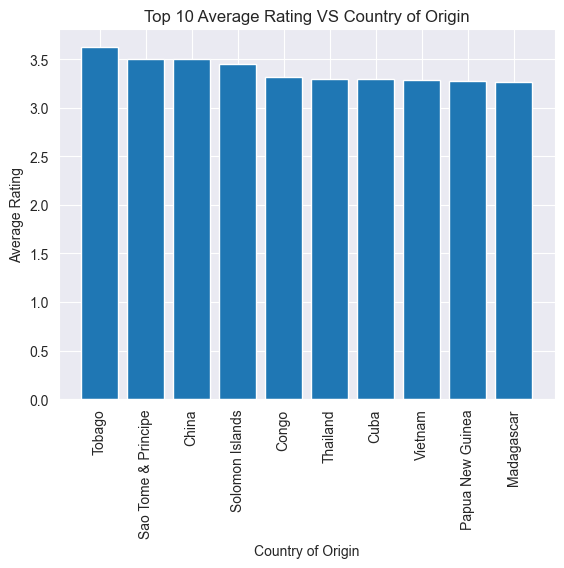

In [98]:
# Getting top 10 average ratings
avg_rating = avg_rating.sort_values('rating', ascending = False)
avg_rating = avg_rating.head(10)

#Plotting the bar chart for better visualization
x = avg_rating['bean_origin']
y = avg_rating['rating']

plt.bar(x,y)
plt.title('Top 10 Average Rating VS Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Average Rating')
plt.xticks(rotation = 90)
plt.show()

Results observed:

1) Cocoa beans originated from Tobago has the highest average rating.
2) Cocoa beans orginated from Puerto Rico has the lowest average rating.

### ****Q2:** How many bars were reviewed for each of those countries?**

In [99]:
num_of_bars = df.groupby('bean_origin')['review'].count().reset_index()
num_of_bars = num_of_bars.sort_values('review', ascending = False)
num_of_bars

,bean_origin,review
60,Venezuela,253
36,Peru,244
13,Dominican Republic,226
14,Ecuador,219
28,Madagascar,177
...,...,...
50,Suriname,1
49,Sumatra,1
48,Sulawesi,1
47,St.Vincent-Grenadines,1


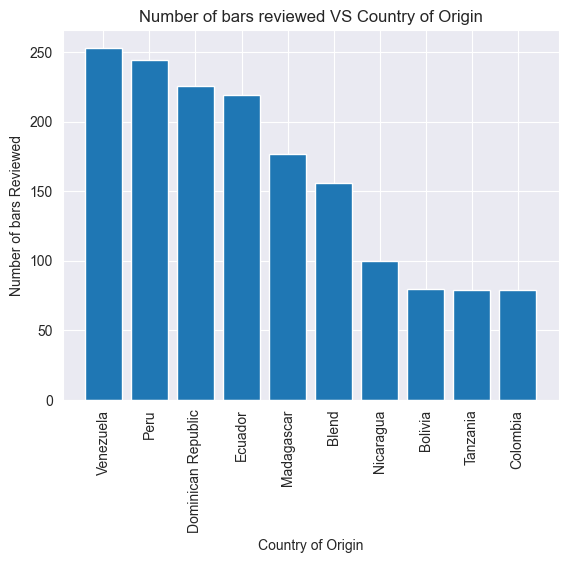

In [100]:
## Top 10 countries with highest reviews
# num_of_bars = num_of_bars.sort_values('review', ascending = False)
num_of_bars = num_of_bars.head(10)
x = num_of_bars['bean_origin']
y = num_of_bars['review']

plt.bar(x,y)
plt.title('Number of bars reviewed VS Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Number of bars Reviewed')
plt.xticks(rotation = 90)
plt.show()

Results Observed:

1) Vanzuela has the highest number of reviews for their choclate (253 reviews).

### ****Q3:** Is the cacao bean's origin an indicator of quality?**

We could say that the Tobago, Sao Tomoe & Principe and China have the highest quality beans, given by their high average ratings. However, it was observed that the number of bars reviewed by China was only 1, hence its high rating value. This could be the reason for the high rating values for several other countries as well. 

To determine whether the cacao bean's origin is an indicator of quality, we plot a boxplot to determine the distribution of the data.

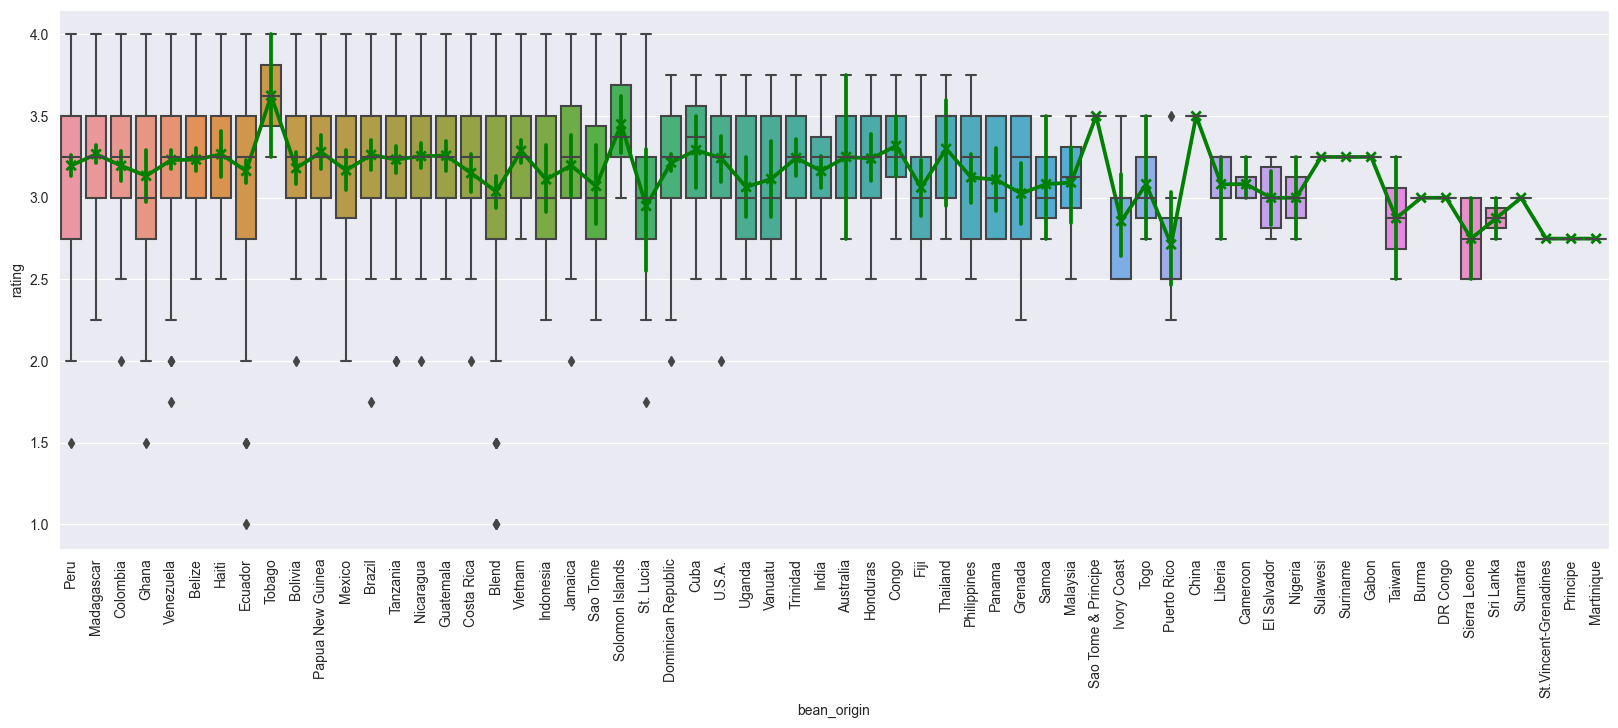

In [101]:
df = df.sort_values('rating', ascending = False)

plt.style.use = ('default')
fig = plt.figure(figsize =(20, 7))
sns.set_style('darkgrid')
sns.boxplot(x = 'bean_origin', y = 'rating', data = df)
sns.pointplot(x='bean_origin', y='rating', data=df, color='green', markers='x')
plt.xticks(rotation = 90)

plt.show()



Result Observation:

From the boxplot distribution, it is observed that most country origins have similar rating median. This indicates that cocoa beans origin is not an indicator of quality.

### **Q4: How does cocoa content relate to rating?**

<function matplotlib.pyplot.show(close=None, block=None)>

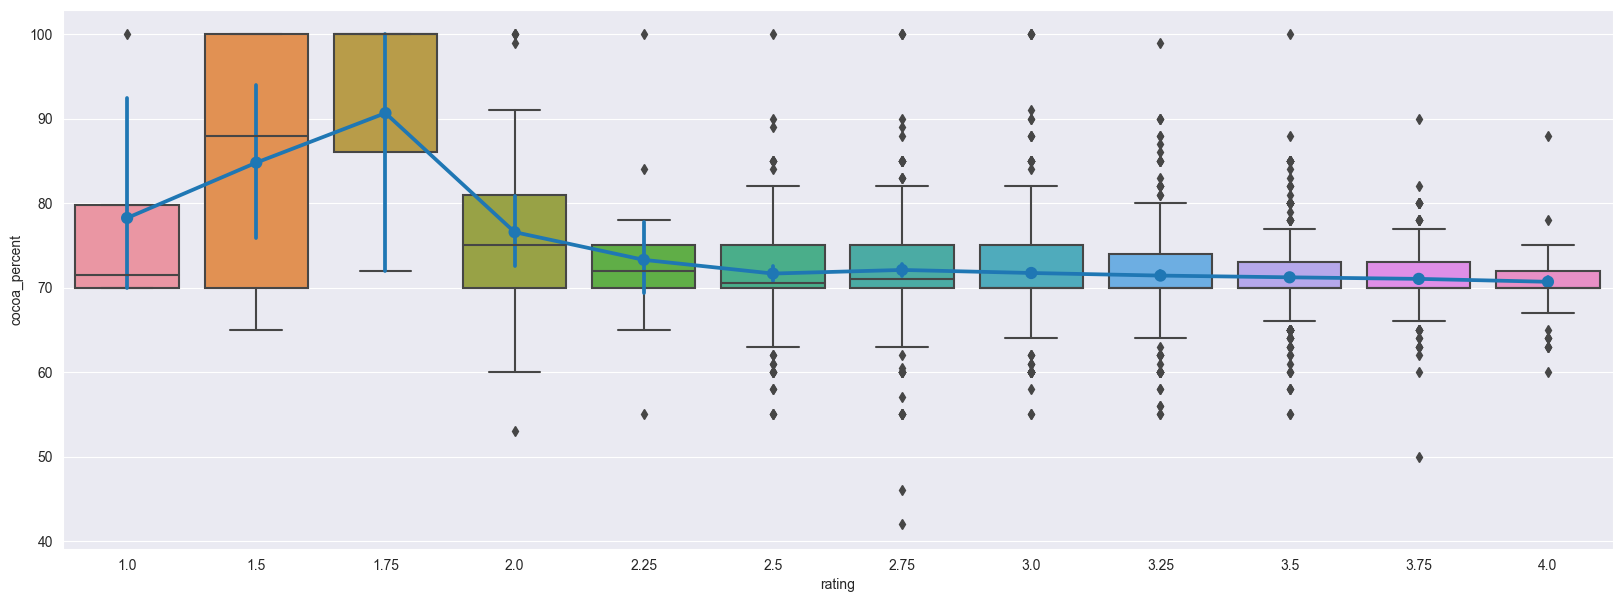

In [102]:
df = df.sort_values('rating', ascending = False)
y = df['cocoa_percent']
x = df['rating']

plt.figure(figsize=(20,7))
sns.boxplot(x=x, y=y)
sns.pointplot(x=x,y=y)
plt.show

Result Observation:

The cocoa_percent shows no correlation to the rating as the median for cocoa_percent is similar, despite higher rating values. This is also proven in the correlation table constructed earlier.

### **Q5:What is the average cocoa content for bars with higher ratings (above 3.5)?**

In [106]:
avg_cocoa_cont = df.loc[df['rating'] > 3.5]
avg_cocoa_cont = avg_cocoa_cont['cocoa_percent'].mean()
print('The average cocoa content for bars with ratings above 3.5 are:' + str(avg_cocoa_cont))

The average cocoa content for bars with ratings above 3.5 are:70.94781553398059


### **Q6: Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).**

In [104]:
import re

no_lecithin = df
no_lecithin = no_lecithin.dropna()
no_lecithin = no_lecithin.loc[no_lecithin['ingredients'].str.contains('l|L', flags = re.I, regex = True)]
no_lecithin_mean = str(no_lecithin['rating'].mean())
print('The average rating for bars without lecithin is :' + no_lecithin_mean)

The average rating for bars without lecithin is :3.150608519269777


In [105]:
with_lecithin = df
with_lecithin = with_lecithin.dropna()
with_lecithin = with_lecithin.loc[~with_lecithin['ingredients'].str.contains('l|L', flags = re.I, regex = True)]
with_lecithin_mean = str(with_lecithin['rating'].mean())
print('The average rating for bars with lecithin is :' + with_lecithin_mean)

The average rating for bars with lecithin is :3.2251282051282053


### **Q7: Summary of Findings.**

SUMMARY:

1) Cocoa beans originated from Tobago has the highest average rating.
2) Cocoa beans orginated from Puerto Rico has the lowest average rating.
3) Vanzuela has the highest number of reviews for their choclate (253 reviews).
4) Cacao beans origin is not an indicator of quality.
5) Cacao content has no correlation to the rating.
6) The average cocoa content for bars with ratings above 3.5 is: 70.95
7) The choclate bars with lecithin （3.23） has a higher mean rating compared to choclate bars without lechithin （3.15).